In [48]:
# import libraries

import os 
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt  

os.chdir('C:/Users/Tam/Documents/Tam/Delhi-Air-Quality-Prediction-master')

In [2]:
# read weather data

fileA = pd.read_excel('city_weather.xls')
fileA['Date'] = pd.to_datetime(fileA['Date'],format='%d.%m.%Y %H:%M')
fileA['Datetime'] = fileA['Date'] - timedelta(minutes=30)
fileA.drop(['Date'],axis=1, inplace=True)
fileA.head()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Datetime
0,9.2,743.5,762.7,-0.5,95.0,"Calm, no wind",0.0,NaN,NaN,50%.,...,"No Cirrus, Cirrocumulus or Cirrostratus.",0.5,8.4,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
1,10.2,743.2,762.3,-0.3,92.0,"Calm, no wind",0.0,NaN,NaN,"90 or more, but not 100%",...,"No Cirrus, Cirrocumulus or Cirrostratus.",0.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 05:00:00
2,11.2,744.4,763.5,1.2,92.0,"Calm, no wind",0.0,NaN,NaN,"90 or more, but not 100%",...,"No Cirrus, Cirrocumulus or Cirrostratus.",0.5,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 08:00:00
3,18.2,745.4,764.1,1.0,64.0,"Calm, no wind",0.0,NaN,NaN,60%.,...,"No Cirrus, Cirrocumulus or Cirrostratus.",1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 11:00:00
4,20.6,743.6,762.1,-1.8,54.0,Wind blowing from the north-northwest,2.0,NaN,NaN,60%.,...,"No Cirrus, Cirrocumulus or Cirrostratus.",1,10.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 14:00:00


In [3]:
temp_fileA = fileA[['T','Po','P','Pa','U','VV','Td','Datetime']]
temp_fileA.head()

,T,Po,P,Pa,U,VV,Td,Datetime
0,9.2,743.5,762.7,-0.5,95.0,0.5,8.4,2015-01-01 02:00:00
1,10.2,743.2,762.3,-0.3,92.0,0.5,9.0,2015-01-01 05:00:00
2,11.2,744.4,763.5,1.2,92.0,0.5,10.0,2015-01-01 08:00:00
3,18.2,745.4,764.1,1.0,64.0,1,11.2,2015-01-01 11:00:00
4,20.6,743.6,762.1,-1.8,54.0,1,10.8,2015-01-01 14:00:00


In [10]:
# read air quality data

fileB = pd.read_csv('city_hour.csv')
fileB = pd.DataFrame(fileB)
fileC = fileB.set_index('City')
fileD = fileC.loc['Delhi']
temp_fileD = fileD.drop(['AQI','AQI_Bucket'],axis=1)
temp_fileD['Datetime'] = pd.to_datetime(temp_fileD['Datetime'])
temp_fileD.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
City,,,,,,,,,,,,,
Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80
Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63
Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18
Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82
Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29


In [19]:
combine = pd.merge(temp_fileA, temp_fileD, on='Datetime')
final = combine[['T','Po','P','Pa','U','VV','Td','PM2.5']]
final.isnull().sum()

T         41
Po        84
P         41
Pa       490
U         61
VV         7
Td        22
PM2.5    120
dtype: int64

In [30]:
final_filled = final.fillna(method='ffill')
final_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15849 entries, 0 to 15848
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       15849 non-null  float64
 1   Po      15849 non-null  float64
 2   P       15849 non-null  float64
 3   Pa      15849 non-null  float64
 4   U       15849 non-null  float64
 5   VV      15849 non-null  object 
 6   Td      15849 non-null  float64
 7   PM2.5   15849 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [36]:
final_filled.loc[final_filled['VV'] == "less than 0.1", 'VV'] = 0.1
final_filled.loc[final_filled['VV'] == "less than 0.05", 'VV'] = 0.05

In [38]:
# Applied machine learning algorithms

y = final_filled['PM2.5']
X = final_filled.drop(['PM2.5'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [40]:
X_train.shape, y_train.shape

((11094, 7), (11094,))

In [41]:
X_test.shape, y_test.shape

((4755, 7), (4755,))

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [43]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [44]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [45]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.38124553467422906

In [46]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [  1.17149134  -6.64242076  10.29158422  -0.56169171   0.56302932
 -18.87270655  -4.88405665]
Root mean squared error: 75.04
Mean absolute error: 50.69
R-squared: 0.38


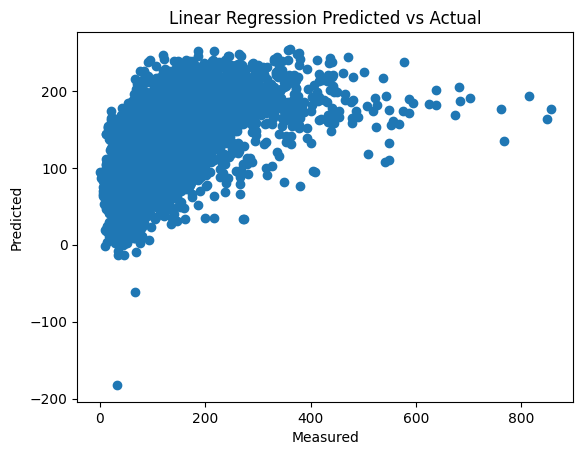

In [49]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [51]:
regr_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1234)

In [52]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.5089677722244085

In [53]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [54]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 66.85
Mean absolute error: 44.15
R-squared: 0.51


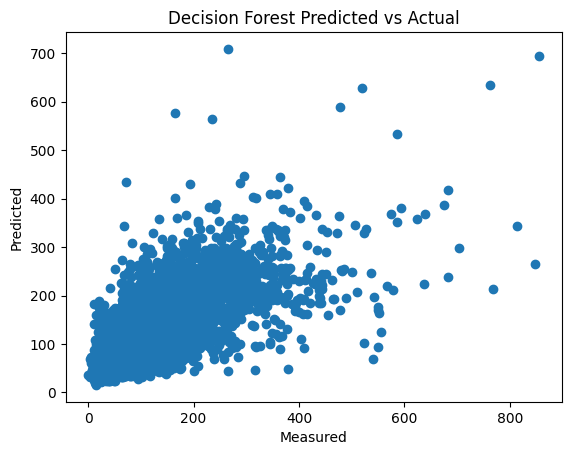

In [55]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()